# Pytorch Model

>  Pytorch Model


- skip_showdoc: true
- skip_exec: true

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([-1.6216, -0.1012, -1.1285], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
z = z.mean()
print(z)

tensor(3.0056, grad_fn=<MeanBackward0>)


In [ ]:
z.backward(retain_graph=True)

In [ ]:
x,y, z

(tensor([-1.6216, -0.1012, -1.1285], requires_grad=True),
 tensor([0.3784, 1.8988, 0.8715], grad_fn=<AddBackward0>),
 tensor(3.0056, grad_fn=<MeanBackward0>))

In [ ]:
x.grad, y.grad

(tensor([0.5045, 2.5318, 1.1620]), tensor([0.5045, 2.5318, 1.1620]))

## For multiple z values

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([ 0.1730,  1.0904, -0.4991], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
#z = z.mean()
print(z)

tensor([ 9.4438, 19.1016,  4.5051], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v, retain_graph=True)

In [ ]:
x, y, z

(tensor([ 0.1730,  1.0904, -0.4991], requires_grad=True),
 tensor([2.1730, 3.0904, 1.5009], grad_fn=<AddBackward0>),
 tensor([ 9.4438, 19.1016,  4.5051], grad_fn=<MulBackward0>))

In [ ]:
x.grad, y.grad

(tensor([8.6920e-01, 1.2362e+01, 6.0034e-03]),
 tensor([8.6920e-01, 1.2362e+01, 6.0034e-03]))

## Stopping gradient descent

In [ ]:
x.requires_grad_(False)
print(x)

tensor([ 0.1730,  1.0904, -0.4991])


In [ ]:
y = x.detach()
print(y)

tensor([ 0.1730,  1.0904, -0.4991])


In [ ]:
with torch.no_grad():
    print(x)

tensor([ 0.1730,  1.0904, -0.4991])


## Zeroing Gradients

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [ ]:
weights = torch.ones(4, requires_grad=True)


In [ ]:
pip list| grep nbdevAuto

nbdevAuto                 0.0.119        /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/nbdevAuto
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from graphviz import Digraph
from nbdevAuto import functions

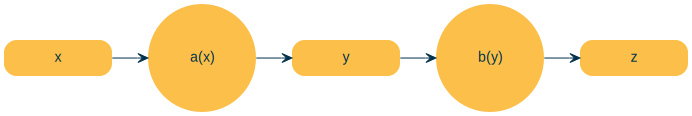

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('a', 'a(x)', shape='circle')
dot.node('y', 'y')
dot.node('b', 'b(y)', shape='circle')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', 'a')
dot.edge('a', 'y')
dot.edge('y', 'b')
dot.edge('b', 'z')

# Render the graph
dot


**Chain rule**

$\dfrac{\delta z}{\delta x} =  \dfrac{\delta z}{\delta y} \cdot \dfrac{\delta y}{\delta x}$

## Computational Graph

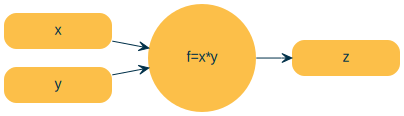

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('*', 'f=x*y', shape='circle')
dot.node('y', 'y')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('y', '*')
dot.edge('*', 'z')

# Render the graph
dot


$\dfrac{\delta z}{\delta x}  = \dfrac{\delta xy}{\delta x} = y$ 

$\dfrac{\delta z}{\delta y}  = \dfrac{\delta xy}{\delta y} = y$ 


$\dfrac{\delta  \ \text{loss}}{\delta x}  = \dfrac{\delta  \ \text{loss}}{\delta z}  \cdot \dfrac{\delta  z}{\delta x}  $ 

1. Forward pass: Computer loss
2. Compute local gradients
3. Backward pass: Compute dLoss/dWeights using the Chain Rule

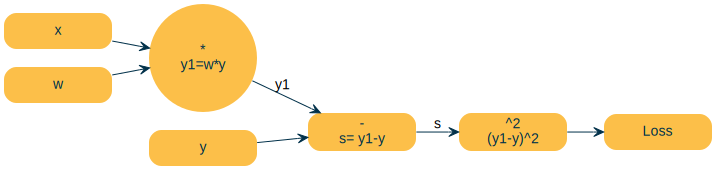

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('w', 'w')
dot.node('*', '*\ny1=w*y', shape='circle')

dot.node('y', 'y')
dot.node('-', '-\ns= y1-y')

dot.node('^2', '^2\n(y1-y)^2')
dot.node('Loss', 'Loss')
# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('w', '*')

dot.edge('*', '-', label='y1')
dot.edge('y', '-')

dot.edge('-', '^2', label='s')

dot.edge('^2', 'Loss')
# Render the graph
dot

$Loss = (\hat{y} - y)^2$ 

$\dfrac{\delta loss}{\delta s} = \dfrac{s^2}{s} = 2s$

$\dfrac{\delta s}{\delta \hat{y}} = \dfrac{\delta\hat{y} - y}{\delta \hat{y}} = 1$

$\dfrac{\delta \hat{y}}{\delta w} = \dfrac{\delta wx}{\delta w} = x$

$\therefore \dfrac{\delta loss}{\delta w} = \dfrac{\delta loss}{\delta s} \cdot \dfrac{\delta s}{\delta y} \cdot  \dfrac{\delta \hat{y}}{\delta w} = 2 \cdot s \cdot x = 2 \cdot (-1) \cdot (1) = -2$


In [ ]:
x = 1
y = 2
w = 1

y1 = x * w 
s = y1-y
loss = s**2

In [ ]:
print(f'x:{x} w:{w} y1:{y1} y:{y} s:{s} loss:{loss}')

x:1 w:1 y1:1 y:2 s:-1 loss:1


In [ ]:
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [ ]:
w = torch.tensor(1.0, requires_grad = True)

lr = 0.005

In [ ]:
#forward pass and compute the loss
y1 = w * x
loss = (y1-y)**2

print(y1)
print(loss)

tensor(1., grad_fn=<MulBackward0>)
tensor(1., grad_fn=<PowBackward0>)


In [ ]:
# backward pass

loss.backward()
print(w.grad)

w.grad.zero_()

tensor(-2.)


tensor(0.)

## Gradient Descent


### Numpy


> Prediction: Manually

> Gradients Computation: Manually

> Loss Computation: Manually

> Parameter updates: Manually


In [ ]:
import numpy as np

In [ ]:
x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient (x, y, y_predicted):
    return np.dot(2 * x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [ ]:
learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    dw = gradient(x, y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoc:{epoch}  w = {w:.3f} , y_pred={forward(5)}, y = {10}, loss = {l:.8f}, dw = {dw}')

print(f'Prediction after training: {forward(5):.3f}, y = {10}')

epoc:0  w = 1.200 , y_pred=6.0, y = 10, loss = 30.00000000, dw = -120.0
epoc:1  w = 1.680 , y_pred=8.399999809265136, y = 10, loss = 4.79999924, dw = -47.999996185302734
epoc:2  w = 1.872 , y_pred=9.35999994277954, y = 10, loss = 0.76800019, dw = -19.200002670288086
epoc:3  w = 1.949 , y_pred=9.743999934196472, y = 10, loss = 0.12288000, dw = -7.679999828338623
epoc:4  w = 1.980 , y_pred=9.897600066661834, y = 10, loss = 0.01966083, dw = -3.072002649307251
epoc:5  w = 1.992 , y_pred=9.95904014110565, y = 10, loss = 0.00314574, dw = -1.2288014888763428
epoc:6  w = 1.997 , y_pred=9.983615934848784, y = 10, loss = 0.00050331, dw = -0.4915158748626709
epoc:7  w = 1.999 , y_pred=9.993446409702301, y = 10, loss = 0.00008053, dw = -0.1966094970703125
epoc:8  w = 1.999 , y_pred=9.997378492355345, y = 10, loss = 0.00001288, dw = -0.07864165306091309
epoc:9  w = 2.000 , y_pred=9.998951268196105, y = 10, loss = 0.00000206, dw = -0.03145551681518555
epoc:10  w = 2.000 , y_pred=9.999580299854276, y

### Torch


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Manually

> Parameter updates: Manually

In [ ]:
x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    w.grad.zero_()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Loss and Pytorch Optimizer


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x


In [ ]:
print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Automate


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
[w,b] = model.parameters()
w[0].item()

-0.9119284152984619

In [ ]:
model.state_dict()['weight']

tensor([[-0.9119]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([-4.1126], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 3.232 1.814, y_pred=17.976, y = 10, loss = 57.2857742, dw = -41.4436264
epoc:20  w = 1.769 0.681, y_pred=9.526, y = 10, loss = 0.0821977, dw = -0.0851871
epoc:40  w = 1.874 0.371, y_pred=9.740, y = 10, loss = 0.0243662, dw = -0.0389004
epoc:60  w = 1.931 0.202, y_pred=9.859, y = 10, loss = 0.0072235, dw = -0.0211780
epoc:80  w = 1.963 0.110, y_pred=9.923, y = 10, loss = 0.0021415, dw = -0.0115299
epoc:100  w = 1.980 0.060, y_pred=9.958, y = 10, loss = 0.0006349, dw = -0.0062776
epoc:120  w = 1.989 0.033, y_pred=9.977, y = 10, loss = 0.0001882, dw = -0.0034181
epoc:140  w = 1.994 0.018, y_pred=9.988, y = 10, loss = 0.0000558, dw = -0.0018613
epoc:160  w = 1.997 0.010, y_pred=9.993, y = 10, loss = 0.0000165, dw = -0.0010126
epoc:180  w = 1.998 0.005, y_pred=9.996, y = 10, loss = 0.0000049, dw = -0.0005509
epoc:200  w = 1.999 0.003, y_pred=9.998, y = 10, loss = 0.0000015, dw = -0.0003018
epoc:220  w = 1.999 0.002, y_pred=9.999, y = 10, loss = 0.0000004, dw = -0.0001646
epoc:24

### Pytorch Model


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(in_features = n_features, out_features = 1)
model

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
[w,b] = model.parameters()
w[0].item()

0.014849305152893066

In [ ]:
model.state_dict()['lin.weight']

tensor([[0.0148]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([0.8469], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 2.606 1.611, y_pred=14.642, y = 10, loss = 22.4837551, dw = -25.9138470
epoc:20  w = 1.767 0.686, y_pred=9.522, y = 10, loss = 0.0833880, dw = -0.0805315
epoc:40  w = 1.873 0.373, y_pred=9.739, y = 10, loss = 0.0247202, dw = -0.0391794
epoc:60  w = 1.931 0.203, y_pred=9.858, y = 10, loss = 0.0073285, dw = -0.0213290
epoc:80  w = 1.962 0.111, y_pred=9.922, y = 10, loss = 0.0021726, dw = -0.0116135
epoc:100  w = 1.980 0.060, y_pred=9.958, y = 10, loss = 0.0006441, dw = -0.0063227
epoc:120  w = 1.989 0.033, y_pred=9.977, y = 10, loss = 0.0001909, dw = -0.0034429
epoc:140  w = 1.994 0.018, y_pred=9.987, y = 10, loss = 0.0000566, dw = -0.0018725
epoc:160  w = 1.997 0.010, y_pred=9.993, y = 10, loss = 0.0000168, dw = -0.0010188
epoc:180  w = 1.998 0.005, y_pred=9.996, y = 10, loss = 0.0000050, dw = -0.0005555
epoc:200  w = 1.999 0.003, y_pred=9.998, y = 10, loss = 0.0000015, dw = -0.0003012
epoc:220  w = 1.999 0.002, y_pred=9.999, y = 10, loss = 0.0000004, dw = -0.0001644
epoc:24

## Linear Regression